# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Abenojar, Joshua\
_Student No._: 2019-08669\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 5, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Joshua M. Abenojar

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [123]:
import numpy as np
data = np.load('spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [124]:
data.files

['spec_recons', 'wavelength']

In [125]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [126]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

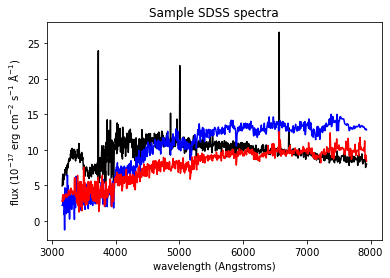

In [127]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


[[0.01561043 0.01639127 0.01926835 ... 0.02382536 0.02528862 0.02533262]
 [0.00670018 0.00669275 0.00668538 ... 0.03928702 0.03958566 0.03920573]
 [0.01120987 0.01118265 0.0137535  ... 0.03793933 0.03719647 0.03424204]
 ...
 [0.00876578 0.01004222 0.01106105 ... 0.02363358 0.03494343 0.0286802 ]
 [0.00819846 0.00924495 0.01032879 ... 0.03921879 0.03613767 0.03775293]
 [0.00986118 0.01037061 0.01260019 ... 0.03539928 0.04028117 0.03950021]]


Text(0.5, 1.0, 'Sample SDSS spectra')

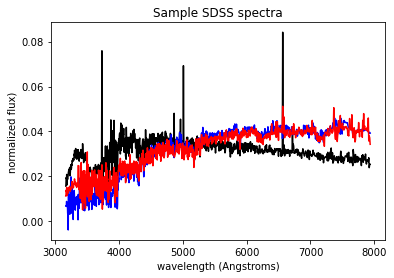

In [128]:
from sklearn.preprocessing import normalize

data_norm=normalize(data['spec_recons'],axis=1)#,norm='l1'
print(data_norm)
fluxn0 = data_norm[0,:]
fluxn1 = data_norm[1,:]
fluxn2 = data_norm[2,:]

plt.plot(wavelength, fluxn0, 'k-')
plt.plot(wavelength, fluxn1, 'b-')
plt.plot(wavelength, fluxn2, 'r-')
plt.ylabel("normalized flux)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

mean=0.029432088136672974;min:-0.6010032296180725;max:0.6766108870506287
Shape=(4000, 1000)


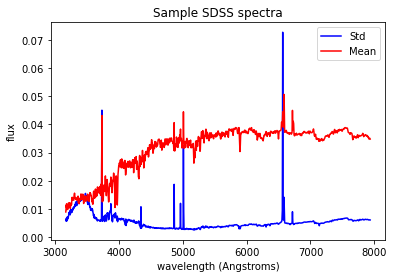

In [129]:
data_ave=np.mean(data_norm,axis=0)
data_std=np.std(data_norm,axis=0)

#plt.plot(wavelength, fluxn0, 'k-',label="flux 1")
plt.plot(wavelength, data_std, 'b-',label="Std")
plt.plot(wavelength, data_ave, 'r-', label="Mean")
plt.ylabel("flux")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")
plt.legend()
print(f"mean={np.mean(data_norm)};min:{np.min(data_norm)};max:{np.max(data_norm)}")
print(f"Shape={np.shape(data_norm)}")

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [130]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_pca=pca.fit_transform(data_norm)
np.shape(X_pca)
print(f'Shape before PCA:{np.shape(data_norm)}')
print(f'Shape after PCA:{np.shape(X_pca)}')

Shape before PCA:(4000, 1000)
Shape after PCA:(4000, 4)


2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

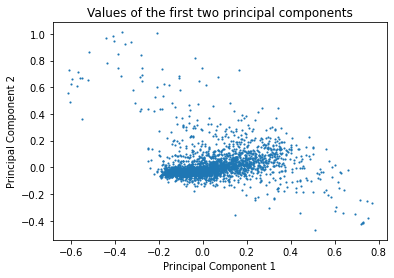

In [131]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.',s=5)
plt.title('Values of the first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

Eigenvalues:[0.02173596 0.01195035 0.00503923 0.00339751]
Eigenvector shape:(4, 1000)
Eigenvector shape:(1000,)


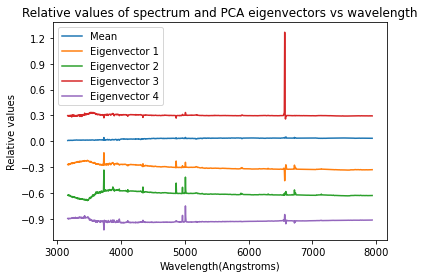

In [132]:
eigenvalues = pca.explained_variance_
eigenvectors=pca.components_
EV1=eigenvectors[0]
EV2=eigenvectors[1]
EV3=eigenvectors[2]
EV4=eigenvectors[3]
print(f'Eigenvalues:{eigenvalues}')
print(f'Eigenvector shape:{np.shape(pca.components_)}')
print(f'Eigenvector shape:{np.shape(EV1)}')


fig = plt.figure()
offset=0.3
ax = plt.axes()
ax.plot(wavelength,data_ave, label="Mean")
ax.plot(wavelength,EV1-1*offset*np.ones(1000), label="Eigenvector 1")
ax.plot(wavelength,EV2-2*offset*np.ones(1000), label="Eigenvector 2")
ax.plot(wavelength,EV3+1*offset*np.ones(1000), label="Eigenvector 3")
ax.plot(wavelength,EV4-3*offset*np.ones(1000), label="Eigenvector 4")
ax.set_yticks(np.linspace(-3*offset,4*offset,8))
ax.set_xlabel('Wavelength(Angstroms)')
ax.set_ylabel('Relative values')
ax.set_title('Relative values of spectrum and PCA eigenvectors vs wavelength')
ax.legend()

## References
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

https://numpy.org/doc/stable/reference/generated/numpy.mean.html

https://www.jcchouinard.com/pca-with-python/

https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca